In [1]:
import requests
import zipfile 
from pathlib import Path 


##setup the data

data_path = Path("/mnt/hdd/Datasets/Torchvision_Datasets/").resolve() 
image_path = data_path / "pizza_steak_sushi"


if image_path.is_dir():
    print(f" {image_path} directory already exists ... skipping download")
else:
    print(f" {image_path} does not exist, cereating one .....")
    image_path.mkdir(parents=True , exist_ok=True)
    
    
    
with open(data_path/"pizza_steak_sushi.zip" , "wb") as f:
    request = requests.get( "https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak  and sushi")
    f.write(request.content)


with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip" , "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data....")
    zip_ref.extractall(image_path)
    

 /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi directory already exists ... skipping download
Unzipping pizza, steak and sushi data....


torch.cuda.is_available(): True
12.1


In [2]:
import os


def walk_through_dir(dir_path):
    
    
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


walk_through_dir(image_path)

There are 2 directories and 0 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi
There are 3 directories and 0 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/test
There are 0 directories and 25 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train
There are 0 directories and 78 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train/sushi


In [3]:
train_dir = image_path / "train"
test_dir = image_path / "test"


/mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train/pizza/218711.jpg
pizza
Random image path: /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train/pizza/218711.jpg
Image class: pizza
Image height: 512
Image width: 382


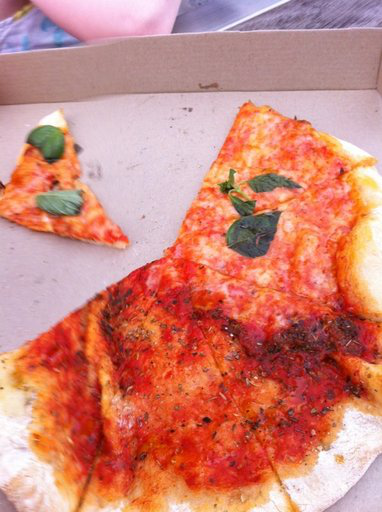

In [4]:
import random 
from PIL import Image 



image_path_list  = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)



img = Image.open(random_image_path)



### Meta data

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 381.5, 511.5, -0.5)

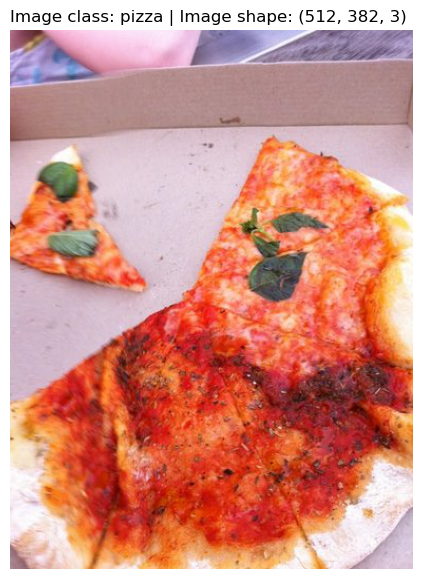

In [5]:
import numpy as np
import matplotlib.pyplot as plt 


img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} ")
plt.axis(False)




In [6]:
### Transforming Data
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

data_transforms = transforms.Compose([
    
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    
])

In [7]:
data_transforms(img).shape

torch.Size([3, 64, 64])

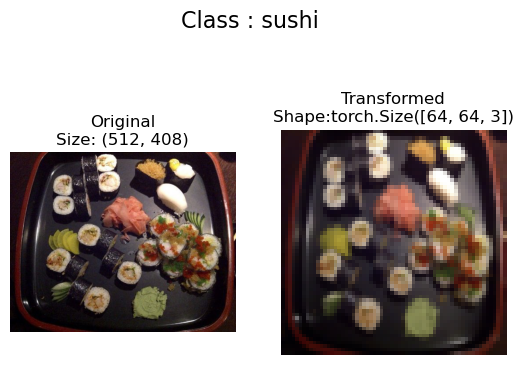

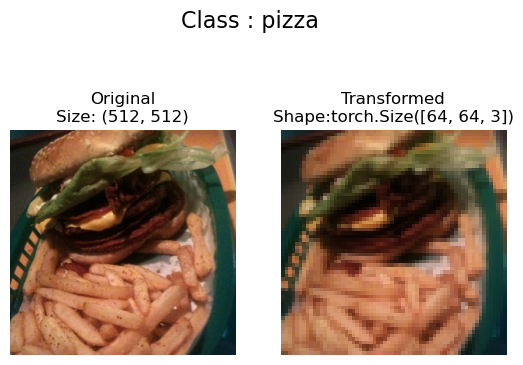

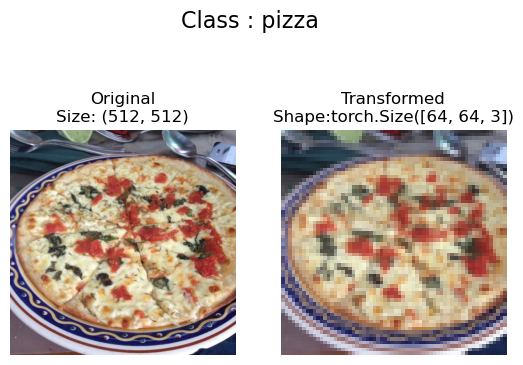

In [8]:
def plot_transformed_images(image_paths:list , transform , n=3 , seed=None):
    if seed:
        random.seed(seed)
    
    random_image_paths = random.sample(image_paths,k=n)
    for image_path  in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax  = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
            ax[1].axis("off")
            
            
            fig.suptitle(f"Class : {image_path.parent.stem}" , fontsize=16)



plot_transformed_images(image_path_list , data_transforms , n=3 , seed=42)

In [9]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir,transform=data_transforms)

test_data = datasets.ImageFolder(root = test_dir , transform = data_transforms)


train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [10]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [11]:
len(train_data) , len(test_data)

(225, 75)

In [12]:
train_data.samples[0]

('/mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train/pizza/1008844.jpg',
 0)

In [13]:
img , label = train_data[0][0] , train_data[0][1]
class_names[label]

'pizza'

In [14]:
img,label = train_data[0][0] , train_data[0][1]

print(f" Image tensor: \n {img} ")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f" Label data type: {type(label)}")

 Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0

Original shape torch.Size([3, 64, 64])
Image permute torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

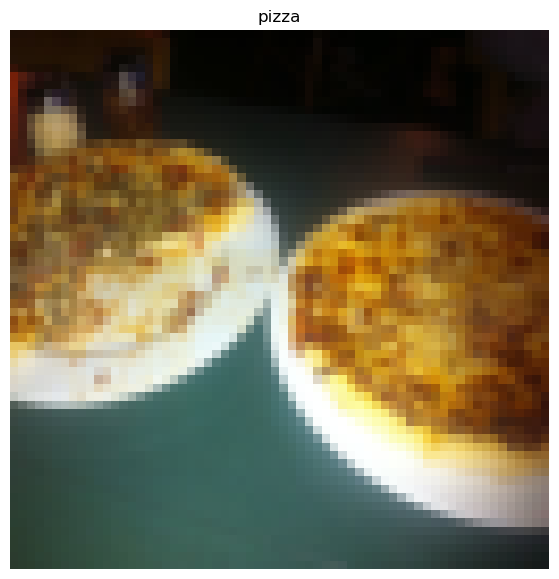

In [15]:
img_permute = img.permute(1,2,0)

print(f"Original shape {img.shape}")
print(f"Image permute {img_permute.shape}")


plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label])

In [16]:
from torch.utils.data import DataLoader 

BATCH_SIZE = 32

train_dataloader = DataLoader( dataset= train_data , batch_size = BATCH_SIZE , num_workers= os.cpu_count())

test_dataloader = DataLoader( dataset= test_data , batch_size = BATCH_SIZE , num_workers=1 , shuffle=False)





In [17]:
len(train_dataloader) , len(test_dataloader)

(8, 3)

In [18]:
img, label = next(iter(train_dataloader))

print(f" Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

 Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


In [19]:
## Custom Class for dataset preparation


import os 
import pathlib
import torch 
from PIL import Image 
from torch.utils.data import Dataset 
from torchvision import transforms 
from typing import Tuple,Dict,List

In [20]:
#Helper function to get class names

target_directory = train_dir 
print(f"Target directory {target_directory}")


class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target directory /mnt/hdd/Datasets/Torchvision_Datasets/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [21]:
def find_classes(directory: str):
    
    classes = sorted(entry.name for entry in list(os.scandir(directory))  if entry.is_dir() )
    
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory} ..... please check file structure")
    
    class_to_idx = {class_name: i for i,class_name in enumerate(classes)}
    return classes,class_to_idx

In [22]:
classes , class_to_idx = find_classes(target_directory)
classes , class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [23]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    
    def __init__( self, targ_dir : str , transforms=None):
        
        
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        
        self.transform = transforms
        self.classes ,  self.class_to_idx = find_classes(targ_dir)
        
        
        
    def load_image(self,index:int) ->Image.Image:
        
        image_path = self.paths[index]
        return Image.open(image_path)
        
    
    def __len__(self)->int:
        
        return len(self.paths)
    
    def __getitem__(self, index:int) -> Tuple[torch.Tensor,int]:
        
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name] 
        
        
        if self.transform:
            return self.transform(img), class_idx 
        
        else:
            return img,class_idx      

In [24]:
train_transforms = transforms.Compose([
    
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    
])


test_transforms = transforms.Compose([
    
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
])

In [25]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,transforms=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,transforms=test_transforms)

len(train_data_custom)
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [26]:
import torch
def display_random_images(dataset: torch.utils.data.Dataset , classes:list[str]=None , n: int = 10, display_shape:bool = True, seed:int = None):
    
    if n>10:
        n = 10
        display_shape = False
        print(f"FOr display purposes n shouldn't be larger than 10, setting to 10 and removing shape display")

    if seed:
        random.seed(seed)
    
    random_samples_idx = random.sample(range(len(dataset)),k=n)
    
    plt.figure(figsize=(16,8))
    
    
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image , targ_label = dataset[targ_sample][0] , dataset[targ_sample][1]
        
        targ_image_adjust = targ_image.permute(1,2,0)
        
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        
        plt.title(title)
        
    
    

FOr display purposes n shouldn't be larger than 10, setting to 10 and removing shape display


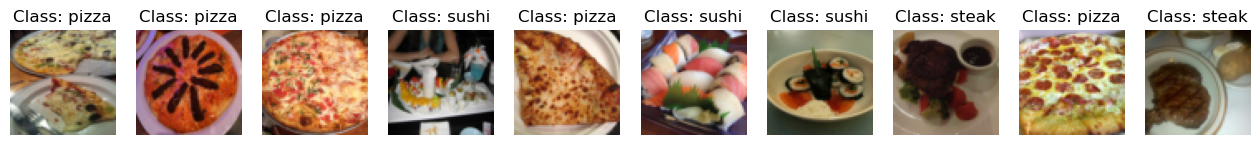

In [27]:
display_random_images(train_data_custom,n=20,classes = class_names, seed=None)

In [28]:
from torch.utils.data import DataLoader 

BATCH_SIZE = 32

train_dataloader_custom = DataLoader(dataset= train_data_custom, batch_size = BATCH_SIZE, num_workers=0, shuffle=True)
test_dataloader_custom = DataLoader(dataset= test_data_custom, batch_size=BATCH_SIZE , num_workers=0 , shuffle=False)



img_custom , label_custom = next(iter(train_dataloader_custom))
img_custom.shape , label_custom.shape



(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [29]:
import torch.nn as nn


class TinyVGG(nn.Module):
    
    
    def __init__(self, input_shape:int , hidden_units:int , output_shape:int) ->None:
        
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        
        self.conv_block_2 = nn.Sequential(
            
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,out_features=output_shape)
        )
        
        
    def forward(self,x):
        x =  self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [30]:
model_0 = TinyVGG(input_shape=3,hidden_units=10,output_shape=len(class_names))

model_0

x = torch.rand(32,3,64,64)
print(model_0(x).shape)

torch.Size([32, 3])


In [31]:
try:
    import torchinfo 
except:
    !pip install torchinfo 
    import torchinfo 

from torchinfo import summary 

summary(model_0,input_size=[1,3,64,64],)

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─BatchNorm2d: 2-2                  [1, 10, 62, 62]           20
│    └─ReLU: 2-3                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-4                       [1, 10, 60, 60]           910
│    └─BatchNorm2d: 2-5                  [1, 10, 60, 60]           20
│    └─ReLU: 2-6                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-7                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-8                       [1, 10, 28, 28]           910
│    └─BatchNorm2d: 2-9                  [1, 10, 28, 28]           20
│    └─ReLU: 2-10                        [1, 10, 28, 28]           --
│    └─Conv2

In [ ]:
from tqdm.auto import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"
def train_step(model: torch.nn.Module ,  dataloader: torch.utils.data.DataLoader , criterion:torch.nn.Module , optimizer : torch.optim.Optimizer , device=device):
    
    model.train()
    model = model.to(device)
    train_loss , train_accuracy = 0 , 0
    
    for batch , ( images , labels) in tqdm(enumerate(dataloader)):
        
        images = images.to(device)
        labels = labels.to(device)
         
        outputs = model(images)
         
        loss = criterion(outputs,labels)
        optimizer.zero_grad()

         
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred_class = torch.argmax(torch.softmax(outputs,dim=1) , dim=1)
        train_accuracy += (pred_class==labels).sum().item()/len(outputs)
    
    
    train_loss = train_loss/len(dataloader)
    train_accuracy = train_accuracy/len(dataloader)
    return train_loss, train_accuracy
    




def test_step(model: torch.nn.Module ,  dataloader: torch.utils.data.DataLoader , criterion:torch.nn.Module , optimizer : torch.optim.Optimizer, device=device):
    
    model.eval()
    model = model.to(device)
    test_loss , test_accuracy = 0 , 0
    
    with torch.inference_mode():
    
        for batch , ( images , labels) in tqdm(enumerate(dataloader)):
            
            images = images.to(device)
            
            labels = labels.to(device)
            
            outputs = model(images)
            
            loss = criterion(outputs,labels)
            test_loss += loss.item()
            pred_class = torch.argmax(torch.softmax(outputs,dim=1) , dim=1)
            test_accuracy += (pred_class==labels).sum().item()/len(outputs)
    
    
    test_loss = test_loss/len(dataloader)
    test_accuracy = test_accuracy/len(dataloader)
    return test_loss , test_accuracy

In [41]:




def train(model:torch.nn.Module , train_dataloader:torch.utils.data.DataLoader , test_dataloader: torch.utils.data.DataLoader , optimizer:torch.optim.Optimizer, criterion:torch.nn.Module, epochs:int = 5, device=device ):
    
    
    results = {"train_loss":[] ,  "train_accuracy":[] , "test_loss":[], "test_accuracy":[]}
    
    for epoch in tqdm(range(epochs)):
        train_loss , train_acc = train_step(model=model , dataloader=train_dataloader , criterion=criterion , optimizer=optimizer,device=device)
        test_loss , test_acc = test_step(model=model , dataloader=test_dataloader , criterion=criterion , optimizer=optimizer,device=device)
        
        
        print(f"Epoch: {epoch} | Training Loss : {train_loss:.4f}  | Test Loss : {test_loss:.4f}  | Train Accuracy: {train_acc:.4f}  |  Test Accuracy {test_acc:.4f}" )
        
        results["train_accuracy"].append(train_acc)
        results["test_accuracy"].append(test_acc)
        results["test_loss"].append(test_loss)
        results["train_loss"].append(train_loss)
        
        
    
    return results
        

In [39]:
image , label = next(iter(train_dataloader_custom))
image.shape , label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [43]:


NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3 , hidden_units=10 , output_shape=len(train_data.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters() , lr = 0.001)

from timeit import default_timer as timer 

start_time = timer()

model_0_results = train(model=model_0 , train_dataloader= train_dataloader_custom , test_dataloader = test_dataloader_custom , optimizer=optimizer , criterion=criterion, epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total Training time: {(end_time-start_time):.4f}")

8it [00:00, 11.52it/s]00:00<?, ?it/s]
3it [00:00, 12.45it/s]
 20%|██        | 1/5 [00:00<00:03,  1.07it/s]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 0 | Training Loss : 1.2329  | Test Loss : 1.0753  | Train Accuracy: 0.3164  |  Test Accuracy 0.5417


8it [00:00, 11.57it/s]
3it [00:00, 13.28it/s]
 40%|████      | 2/5 [00:01<00:02,  1.08it/s]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 1 | Training Loss : 0.9504  | Test Loss : 1.0689  | Train Accuracy: 0.4805  |  Test Accuracy 0.2604


8it [00:00, 11.59it/s]
3it [00:00, 13.26it/s]
 60%|██████    | 3/5 [00:02<00:01,  1.08it/s]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 2 | Training Loss : 0.8235  | Test Loss : 0.9908  | Train Accuracy: 0.6445  |  Test Accuracy 0.4536


8it [00:00, 11.65it/s]
3it [00:00, 13.26it/s]
 80%|████████  | 4/5 [00:03<00:00,  1.09it/s]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 3 | Training Loss : 0.6120  | Test Loss : 1.0182  | Train Accuracy: 0.7578  |  Test Accuracy 0.4044


8it [00:00, 11.55it/s]
3it [00:00, 13.12it/s]
100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 4 | Training Loss : 0.6999  | Test Loss : 0.9310  | Train Accuracy: 0.6211  |  Test Accuracy 0.5256
Total Training time: 4.6208


In [46]:


def plot_loss_curves(results: dict[str,list[float]]):
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    accuracy = results["train_accuracy"]
    test_accuracy = results["test_accuracy"]
    
    
    epochs = range(len(results["train_loss"]))
    
    
    plt.figure(figsize=(15,7))
    
    
    
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label = "train_loss")
    plt.plot(epochs,test_loss,label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label = "train_accuracy")
    plt.plot(epochs,test_accuracy,label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    
    

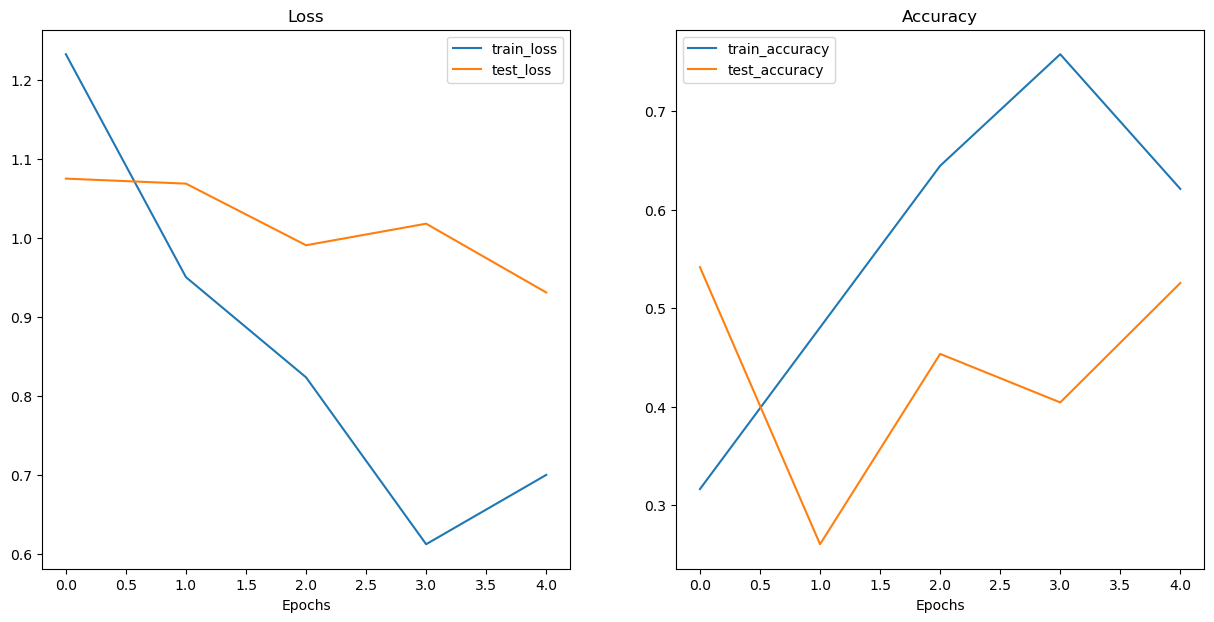

In [47]:
plot_loss_curves(model_0_results)

In [48]:
model_1 = TinyVGG(input_shape=3,hidden_units=100,output_shape=len(class_names))

model_1
x = torch.rand(32,3,64,64)
print(model_1(x).shape)

torch.Size([32, 3])


In [49]:
start_time = timer()

model_1_results = train(model=model_1 , train_dataloader= train_dataloader_custom , test_dataloader = test_dataloader_custom , optimizer=optimizer , criterion=criterion, epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total Training time: {(end_time-start_time):.4f}")

8it [00:00,  9.47it/s]00:00<?, ?it/s]
3it [00:00, 12.40it/s]
 20%|██        | 1/5 [00:01<00:04,  1.11s/it]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 0 | Training Loss : 1.1961  | Test Loss : 1.1226  | Train Accuracy: 0.2969  |  Test Accuracy 0.1979


8it [00:00, 10.01it/s]
3it [00:00, 12.47it/s]
 40%|████      | 2/5 [00:02<00:03,  1.07s/it]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 1 | Training Loss : 1.1612  | Test Loss : 1.1351  | Train Accuracy: 0.2812  |  Test Accuracy 0.2083


8it [00:00, 10.01it/s]
3it [00:00, 12.46it/s]
 60%|██████    | 3/5 [00:03<00:02,  1.06s/it]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 2 | Training Loss : 1.1464  | Test Loss : 1.1199  | Train Accuracy: 0.4180  |  Test Accuracy 0.3210


8it [00:00, 10.07it/s]
3it [00:00, 12.42it/s]
 80%|████████  | 4/5 [00:04<00:01,  1.05s/it]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 3 | Training Loss : 1.1815  | Test Loss : 1.0874  | Train Accuracy: 0.2734  |  Test Accuracy 0.3920


8it [00:00,  9.93it/s]
3it [00:00, 11.86it/s]
100%|██████████| 5/5 [00:05<00:00,  1.06s/it]

torch.Size([32])
torch.Size([32])
torch.Size([11])
Epoch: 4 | Training Loss : 1.1798  | Test Loss : 1.0765  | Train Accuracy: 0.2969  |  Test Accuracy 0.4432
Total Training time: 5.2937


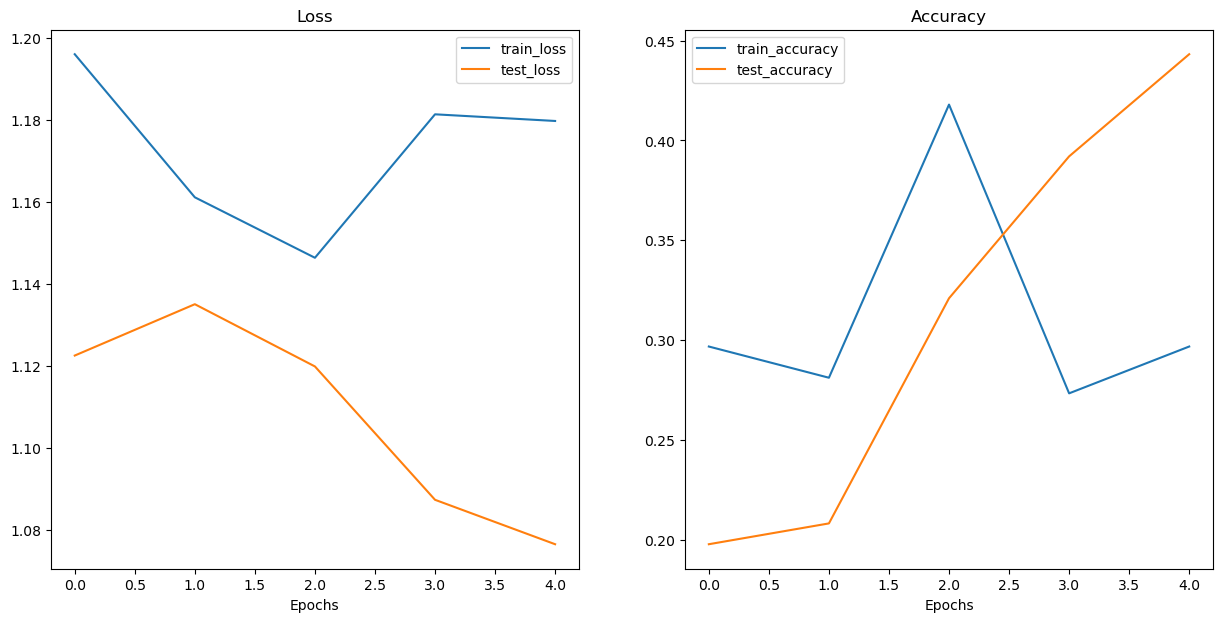

In [50]:
plot_loss_curves(model_1_results)

In [52]:
### Comparing model results

import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)


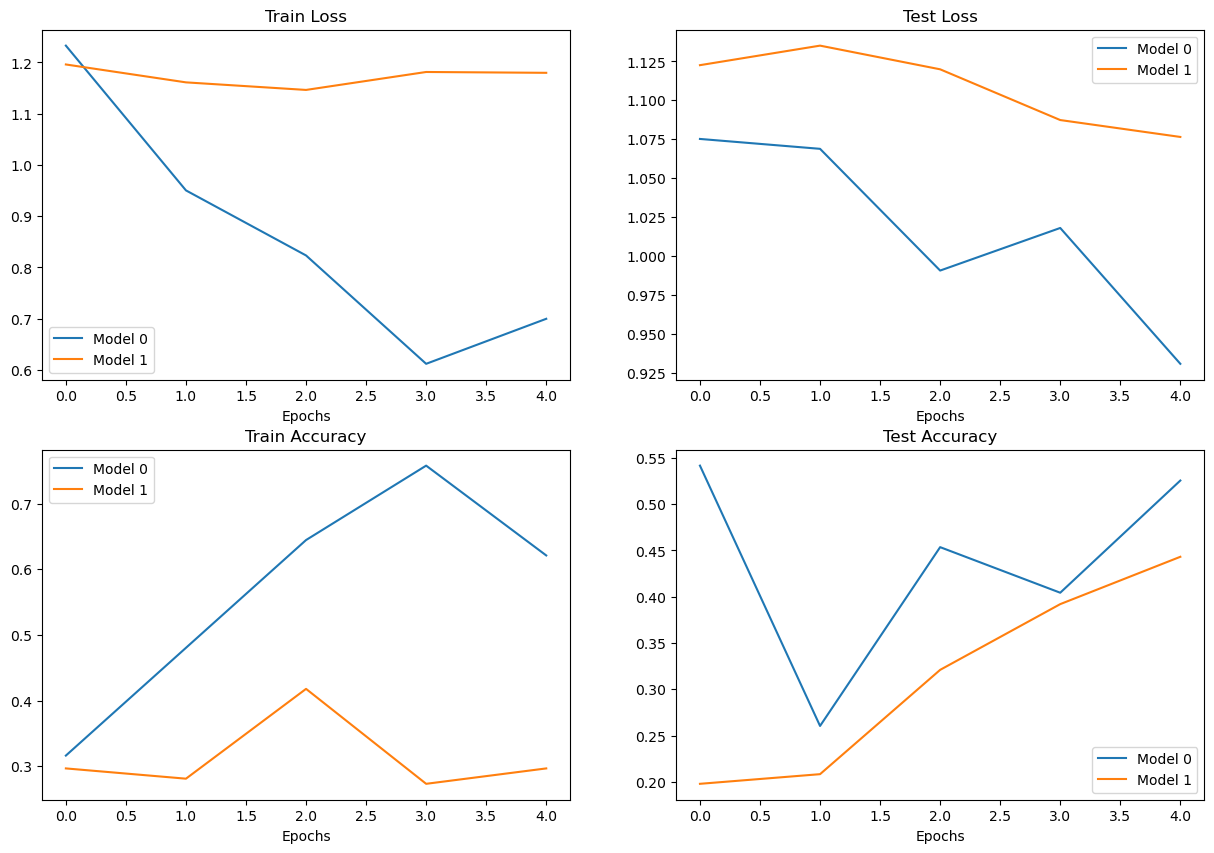

In [56]:
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"] , label = "Model 0")
plt.plot(epochs,model_1_df["train_loss"] , label = "Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()



plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"] , label = "Model 0")
plt.plot(epochs,model_1_df["test_loss"] , label = "Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["train_accuracy"] , label = "Model 0")
plt.plot(epochs,model_1_df["train_accuracy"] , label = "Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()



plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_accuracy"] , label = "Model 0")
plt.plot(epochs,model_1_df["test_accuracy"] , label = "Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [58]:
### Predicting on Custom Data

import requests

custom_image_path = data_path / "04-pizza-ada.jpeg"
if not custom_image_path.is_file():
    
    with open(custom_image_path , "wb") as f:
        
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
        print(f"Downloading {custom_image_path}.... ")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists skipping download....")

/mnt/hdd/Datasets/Torchvision_Datasets/04-pizza-ada.jpeg already exists skipping download....


 Custom image shape:
  torch.Size([3, 4032, 3024])
 Custom image data type:
  torch.uint8


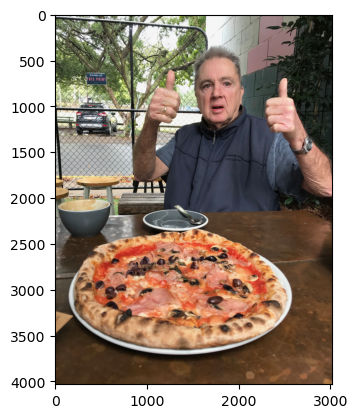

In [60]:
import torchvision 



custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
plt.imshow(custom_image_uint8.permute(1,2,0))

print(f" Custom image shape:\n  {custom_image_uint8.shape}")
print(f" Custom image data type:\n  {custom_image_uint8.dtype}")

In [101]:
from torchvision import transforms 


custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.


custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])


custom_image_transformed = custom_image_transform(custom_image)

print(f"Transformed shape {custom_image_transformed.shape}")
print(f"Transformed data type {custom_image_transformed.dtype}")

Transformed shape torch.Size([3, 64, 64])
Transformed data type torch.float32


In [102]:
model_0.eval()

with torch.inference_mode(): 
    
    custom_image_transformed = custom_image_transformed.unsqueeze(dim=0).to(device)
    model_0  = model_0.to(device)
    result = model_0(custom_image_transformed)
    result_index = result.argmax(dim=1)
    result_class = class_names[result_index]
    print(result_class)

pizza
